# Iris dataset example (from UCL staset repository)

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
Accuracy,0.933±0.033
BA,0.933±0.033
Precision,0.942±0.029
Recall,0.933±0.033
MCC,0.905±0.047
cm,"[[50, 0, 0], [0, 45, 5], [0, 5, 45]]"


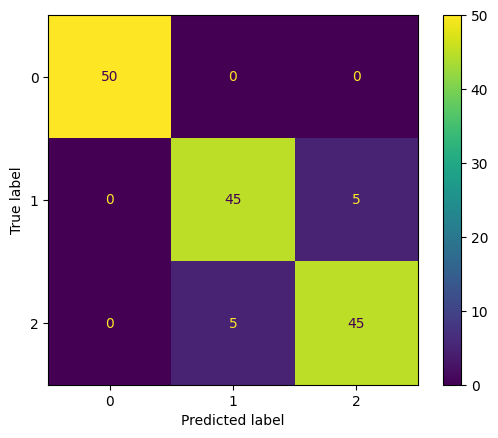

In [2]:
from svelearn.models.splitvotingens import SplitVotingEnsemble
from svelearn.validation.crossvalidate import skfold_cv
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
myscorer = {'Accuracy'  :  (accuracy_score , {}),
             'BA'  :       (balanced_accuracy_score , {}),
             'Precision' : (precision_score, {'pos_label': 1, 'average':'macro'}),
             'Recall' :    (recall_score   , {'pos_label': 1, 'average':'macro'}),
             'MCC' :       (matthews_corrcoef, {}), 
            }
import pandas as pd
clf = RandomForestClassifier()
svclf = SplitVotingEnsemble(clf)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data['target']
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=3)
df_scores